In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from agents import SatisfiaAgent
from games import JOBST_GAME
from monte_carlo import combined_strategies
from network.closeness_centrality import NetworkByCentrality

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
N_AGENTS = 100
EDGES_PER_NODE = 2
BASE_BARABASI = nx.barabasi_albert_graph(N_AGENTS, EDGES_PER_NODE)

In [4]:
my_graph = NetworkByCentrality(
                                game = JOBST_GAME,
                                strategy_dict = combined_strategies,
                                satisfia_share = 0.5,
                                generations = 500,
                                base_graph = BASE_BARABASI,
                                draw_network_interval = 100,
                                shift_most_central = 17
)

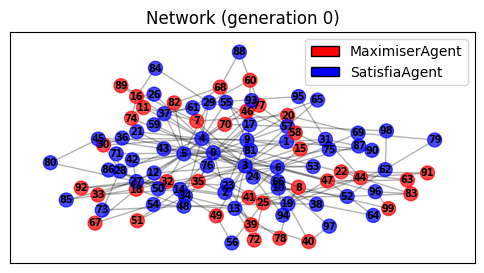

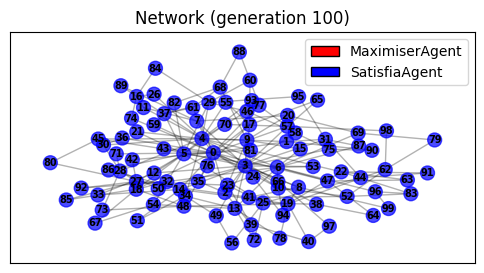

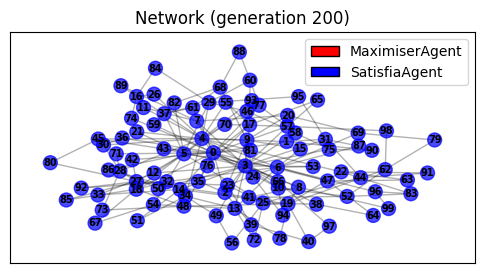

C:\Users\PaulV\PycharmProjects\satisfia_marl\network\base_class.py:113: RuntimeWarning: overflow encountered in exp
  p_switch = 1/(1+np.exp(self.learn_param_a +


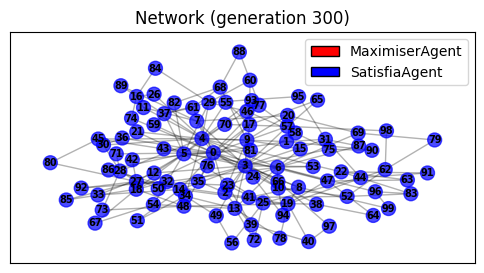

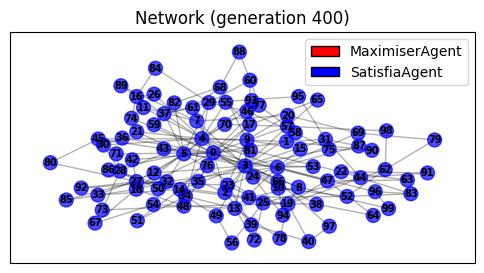

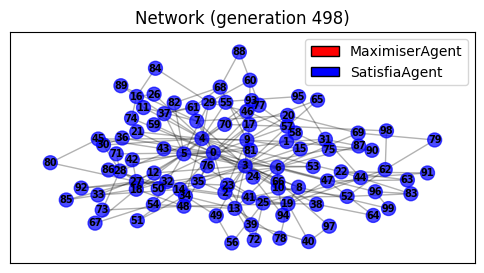

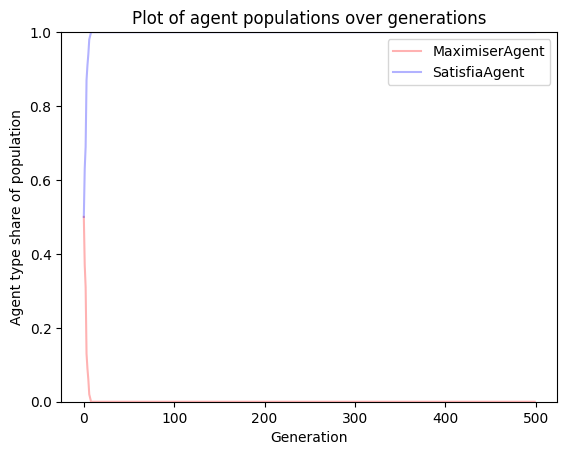

{agents.MaximiserAgent: [50,
  37,
  31,
  13,
  9,
  6,
  2,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

In [5]:
my_graph.iterate_generations(1, 1, plot=True)

In [6]:
trajectories = my_graph.get_iteration_repeats(p_play_game=0.1, p_social_learning=0.1, n_repeats=25)
my_graph.plot_agent_count_percentiles(trajectories)

 ... (more hidden) ...


KeyboardInterrupt: 

In [19]:
# Constant parameters for experimenting over centrality shifts
N_AGENTS = 100
EDGES_PER_NODE = 2
BASE_BARABASI = nx.barabasi_albert_graph(N_AGENTS, EDGES_PER_NODE)
SATISFIA_SHARE=0.5
# Defining range of shifts
centrality_shifts = np.arange(stop=round(N_AGENTS*(1-SATISFIA_SHARE)), step=4)[:6]
print(centrality_shifts)

[ 0  4  8 12 16 20]


 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...


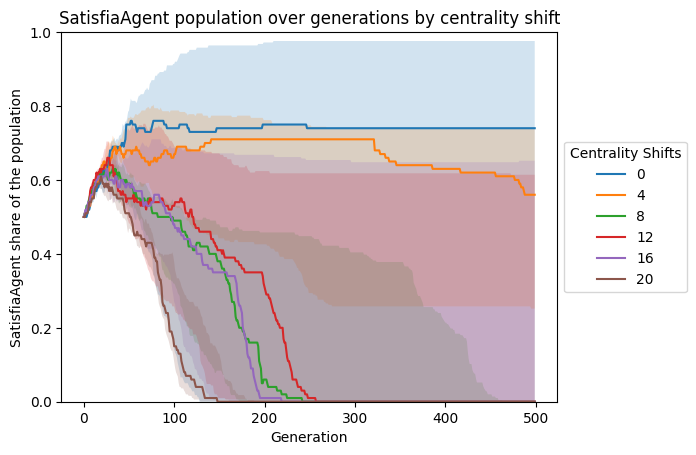

In [23]:
def experiment_over_shifts(satisfia_share: float, generations: int, p_play_game: float, p_social_learning: float, 
                           range_of_shifts: list[int], agent_to_plot=SatisfiaAgent, repeats: int = 5):

    for shift in range_of_shifts:

        a_graph = NetworkByCentrality(
                            game = JOBST_GAME,
                            strategy_dict = combined_strategies,
                            satisfia_share = satisfia_share,
                            generations = generations,
                            base_graph = BASE_BARABASI,
                            draw_network_interval = 100,
                            shift_most_central = shift
        )
    
        trajectories = a_graph.get_iteration_repeats(p_play_game=p_play_game, p_social_learning=p_social_learning, n_repeats=repeats)
        agent_counts = trajectories[agent_to_plot]

        q1, median, q3 = np.percentile(agent_counts/a_graph.n_agents, (40, 50, 60), axis=0)
        plt.plot(median, label=shift)
        plt.fill_between(range(a_graph.generations), q1, q3, alpha=0.2)

    plt.title(f'{agent_to_plot.__name__} population over generations by centrality shift')
    plt.xlabel('Generation')
    plt.ylabel(f'{agent_to_plot.__name__} share of the population')
    plt.ylim([0,1])
    plt.legend(title='Centrality Shifts',loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()


experiment_over_shifts(satisfia_share=0.5, generations=500, p_play_game=0.1, p_social_learning = 0.1, 
                       range_of_shifts = centrality_shifts, agent_to_plot=SatisfiaAgent, repeats = 25)